In [1]:
import sys
sys.path.append('../../../lib')
from tqdm import tqdm
from scipy.signal import fftconvolve
import numpy as np
import os
import matplotlib.pyplot as plt
from fast_detection_methods import trajectory_gauss, trajectory_mean, trajectory_corr, fit_gaussian, find_ideal_R,most_common_value
from movie_processing import movie_to_array, clean_problem_pixels
from Powerspectra import powerspectrum, fit_power_spectrum, plot_power_spectra, fast_analytical_noisy_powerspectrum
#from pipython.datarectools import getservotime
import cv2
#core.set_exposure(0.5)##sets the cameras exposure time for snapshots to half a milisecond

In [2]:
def movie_files_from_data_path(data_path):
    files = os.listdir(data_path)
    avi_files = [f for f in files if f[-4:] == '.avi']
    file_paths = [os.path.join(data_path, f) for f in avi_files]
    return file_paths

data_path = r'\\134.76.13.158\betzlab\Julian\cell_beats\19_02_2024\Sample1'

In [3]:
movie_files = movie_files_from_data_path(data_path)

In [6]:
movie_list = []
picture_pair_list = []
for file in movie_files:
    numpy_movie = movie_to_array(file, max_frames=100)
    numpy_movie = clean_problem_pixels(numpy_movie)
    numpy_movie = numpy_movie - most_common_value(numpy_movie)
    
    movie_list.append(numpy_movie)
    picture_pair_list.append(numpy_movie[:3])

Processing video:   0%|          | 0/100 [00:00<?, ?frame/s]

Processing video: 100%|██████████| 100/100 [00:00<00:00, 2085.45frame/s]


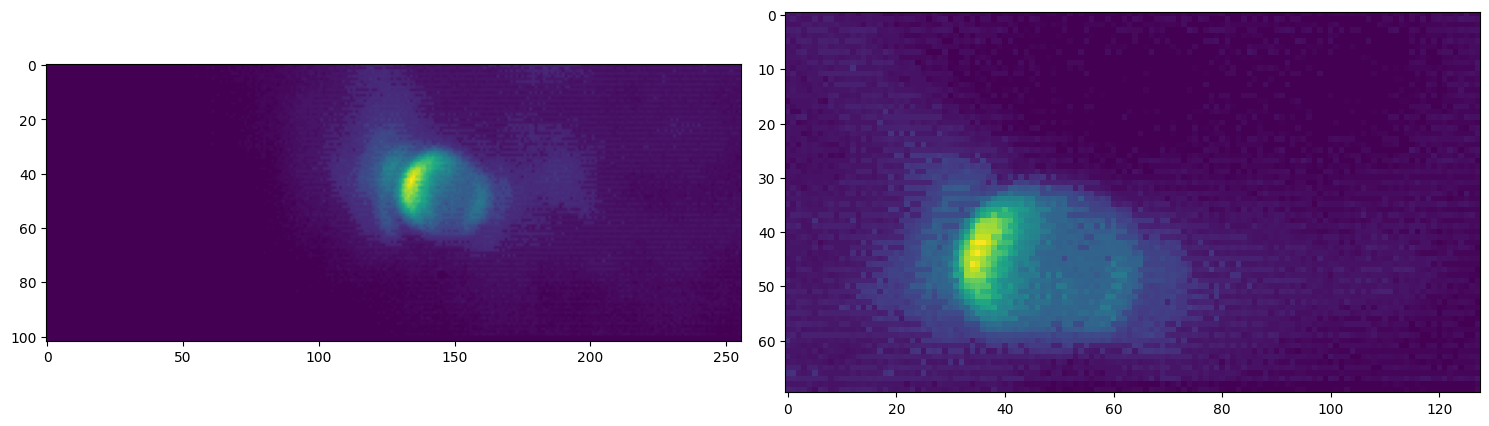

In [7]:

# Initialize a new figure
fig, axes = plt.subplots(1, len(picture_pair_list), figsize=(15, 5))
# Loop through each movie and display its first frame
for ax, movie in zip(axes, picture_pair_list):
    ax.imshow(movie[0])
    #ax.axis('off')  # Hides the axis numbers and ticks
    


plt.tight_layout()
plt.show()


In [8]:
for movie_path, movie in zip(movie_files, movie_list):
    print(movie_path)
    print(movie.shape)
    #movie = movie - most_common_value

\\134.76.13.158\betzlab\Julian\cell_beats\19_02_2024\Sample1\Export_20240219_215526.avi
(100, 102, 256)
\\134.76.13.158\betzlab\Julian\cell_beats\19_02_2024\Sample1\Export_20240219_221029.avi
(100, 70, 128)


In [9]:
from fast_detection_methods import fit_gaussian

In [10]:
concolce_list = []
peak_list = []
filtered_conv_list = []
R = 10
for picture_pair in picture_pair_list:
    conv_picture = fftconvolve(picture_pair[0], np.flip(picture_pair[1]), mode='same')
    concolce_list.append(conv_picture)
    hight = conv_picture.shape[0]
    peak, uncertainty = fit_gaussian(conv_picture, R)
    peak_list.append(peak)

# Initialize a new figure
fig, axes = plt.subplots(1, len(picture_pair_list), figsize=(15, 5))

# Loop through each movie and display its first frame
for ax, conv, peak in zip(axes, concolce_list, peak_list):
    ax.imshow(conv)
    #ax.axis('off')  # Hides the axis numbers and ticks
    ax.scatter(peak[0], peak[1], color='red', s=100)

plt.tight_layout()
plt.show()

In [20]:
tra_corr_list = []
for movie in movie_list:
    tra_corr_list.append(trajectory_corr(movie))

Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.


Processing frames: 100%|██████████| 99/99 [00:00<00:00, 625.76frame/s]


Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.


Processing frames: 100%|██████████| 99/99 [00:00<00:00, 938.17frame/s]


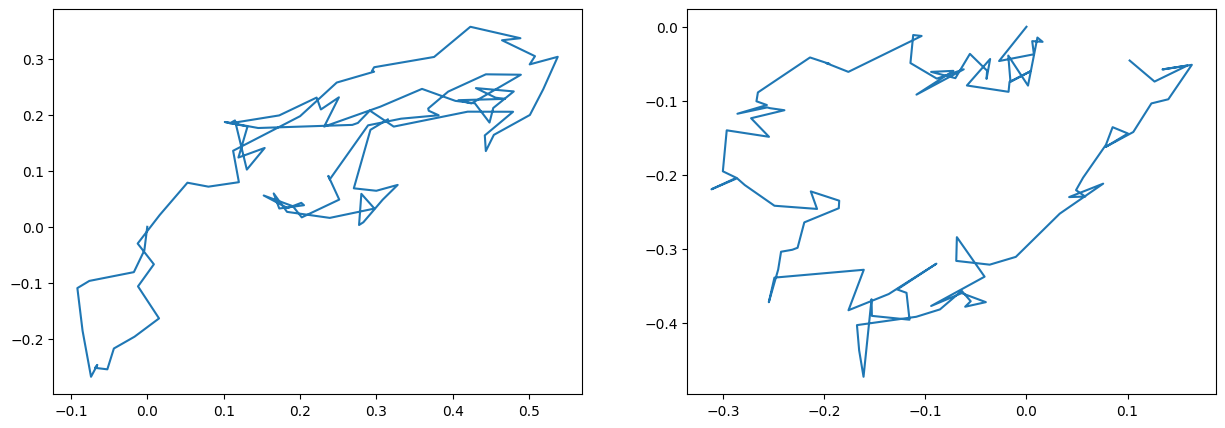

In [21]:
fig, axes = plt.subplots(1, len(movie_list), figsize=(15, 5))

# Loop through each movie and display the calculated trajectory
for ax, tra_corr in zip(axes, tra_corr_list):
    ax.plot(tra_corr[:,0], tra_corr[:,1])

In [22]:
movie_list[-1].shape

(100, 70, 128)

In [23]:
tra_corr=trajectory_corr(numpy_movie)

Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.


Processing frames: 100%|██████████| 99/99 [00:00<00:00, 891.58frame/s]


In [24]:
from fast_detection_methods import find_shift_corr, fit_gaussian

In [25]:
find_shift_corr(numpy_movie[0],numpy_movie[0],4)

(-42.68413757578415, -129.25403348814578, 2051965.406582034, 684961.4797745754)

In [26]:
test_movie = np.array([numpy_movie[0] for i in range(100)])
testtra_corr=trajectory_corr(test_movie)

Processing frames: 100%|██████████| 99/99 [00:00<00:00, 1073.31frame/s]


In [27]:
image_1 = numpy_movie[0]
image_2 = numpy_movie[1]
R =5
fft_convolved_image = fftconvolve(image_1, np.flip(image_2), mode='same')
peak, uncertainty = fit_gaussian(fft_convolved_image, R)

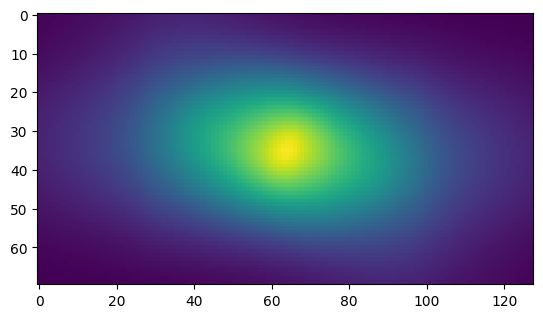

In [28]:
plt.imshow(fft_convolved_image)

In [29]:
peak

(64.04729753031724, 35.02551625409446)

In [30]:
uncertainty

array([0.03282353, 0.03280666])

In [31]:
test_movie[1]=test_movie[0]

In [32]:
plt.plot(testtra_corr[:,0],testtra_corr[:,1])   

In [11]:
tra_mean = trajectory_mean(numpy_movie)
tra_corr=trajectory_corr(numpy_movie)
gauss_degrees = range(2)
tra_gauss_list = []
for degree in gauss_degrees:
    tra_gauss_list.append(trajectory_gauss(numpy_movie, degree=degree))

Processing frames: 100%|██████████| 100/100 [00:00<?, ?frame/s]

Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.


Filling in frames: 100%|██████████| 99/99 [00:00<00:00, 9443.84it/s]

In [8]:
trajectory_list = [tra_mean, tra_corr] + tra_gauss_list
name_list = ['mean', 'corr'] + ['gauss_' + str(degree) for degree in gauss_degrees]

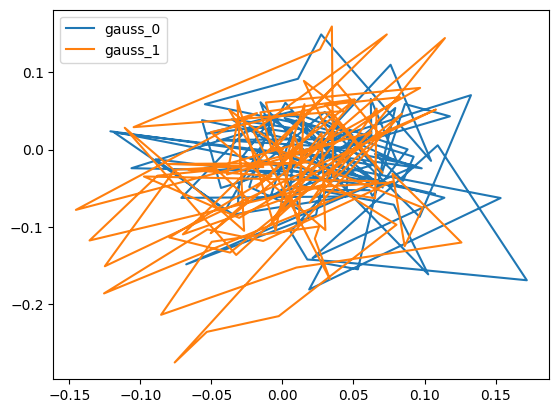

In [11]:
#plot all trajectories

for i, trajectory in enumerate(trajectory_list):
    name = name_list[i]
    if name!= 'mean' and name != 'corr' : # Use != instead of 'is not'
        plt.plot(trajectory[:, 0], trajectory[:, 1], label=name)
plt.legend()
plt.show()


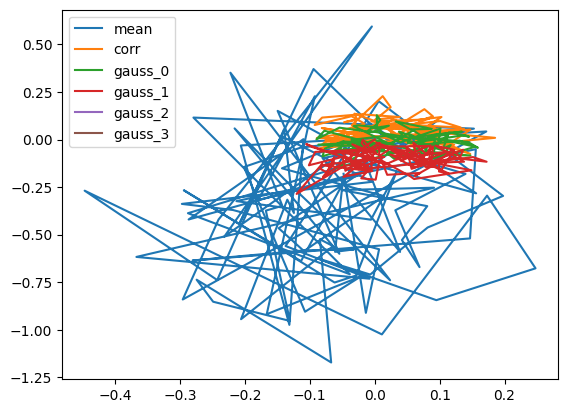

In [67]:

for i, trajectory in enumerate(trajectory_list):
    name = name_list[i]
    plt.plot(trajectory[:, 0], trajectory[:, 1], label=name)
plt.legend()
plt.show()